In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [3]:

# Fetch environment variables with a fallback to avoid None errors
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")
GROQ_API_KEY = os.getenv("GROQ_API_KEY")
LANGSMITH_API_KEY = os.getenv("LANGSMITH_API_KEY")
LANGSMITH_PROJECT = os.getenv("LANGSMITH_PROJECT")
LANGSMITH_ENDPOINT = os.getenv("LANGSMITH_ENDPOINT")
LANGSMITH_TRACING = os.getenv("LANGSMITH_TRACING")

# Set environment variables
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["GROQ_API_KEY"] = GROQ_API_KEY
os.environ["LANGSMITH_API_KEY"] = LANGSMITH_API_KEY
os.environ["LANGSMITH_PROJECT"] = LANGSMITH_PROJECT
os.environ["LANGSMITH_ENDPOINT"] = LANGSMITH_ENDPOINT
os.environ["LANGSMITH_TRACING"] = LANGSMITH_TRACING


In [8]:
def function1(ip1):
    return ip1 + " Added from function 1"

def function2(ip2):
    return ip2 + " Added from function 2"

In [6]:
from langgraph.graph import Graph


In [7]:
workflow1 = Graph()

In [ ]:
workflow1.add_node("function1",function1)
workflow1.add_node("function2",function2)


In [ ]:
workflow1.add_edge("function1","function2")

In [ ]:
workflow1.set_entry_point("function1")
workflow1.set_finish_point("function2")

In [21]:
app1 = workflow1.compile()

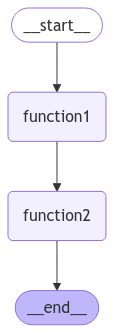

In [22]:
from IPython.display import Image,display


try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [24]:
app1.invoke("Hello World")
input = "Hello World"

In [25]:
for output in app1.stream(input):
    for key,value in output.items():
        print(f"Here is output from node {key}")
        print(value)
        print("\n")

Here is output from node function1
Hello World Added from function 1


Here is output from node function2
Hello World Added from function 1 Added from function 2




In [27]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="gemini-1.5-flash")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

In [28]:
llm.invoke("Hi").content

'Hi there! How can I help you today?'

In [29]:
def function1(input):
    return llm.invoke(input).content

In [30]:
def function2(input):
    return input.upper()

In [32]:
from langgraph.graph import Graph

In [33]:
workflow1 = Graph()

In [40]:
workflow1.add_node("func1",function1)
workflow1.add_node("func2",function2)
workflow1.add_edge("func1","func2")

Adding a node to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding a node to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [ ]:
workflow1.set_entry_point("func1")
workflow1.set_finish_point("func2")

In [46]:
app1 = workflow1.compile()

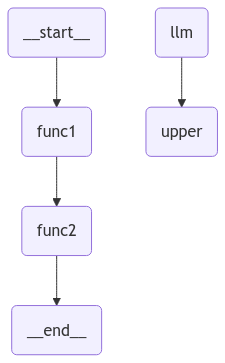

In [47]:
from IPython.display import Image,display
try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [48]:
app1.invoke("How are you")

'I AM DOING WELL, THANK YOU FOR ASKING.  HOW ARE YOU TODAY?'